In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [5]:
data.info() #No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().any()
data.reset_index(inplace=True)

In [8]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3998.000000,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,2014.348174,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1160.526850,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,1.000000,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1010.250000,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,2015.500000,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,3019.750000,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [9]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


## EDA 

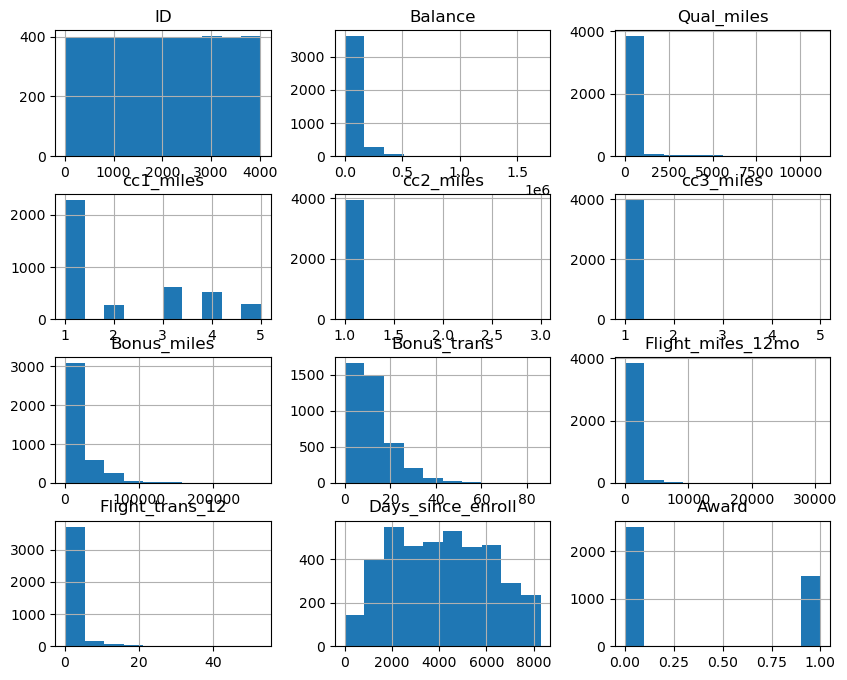

In [10]:
#histogram
data.hist(bins=10,figsize=(10,8))
plt.show()

<Axes: >

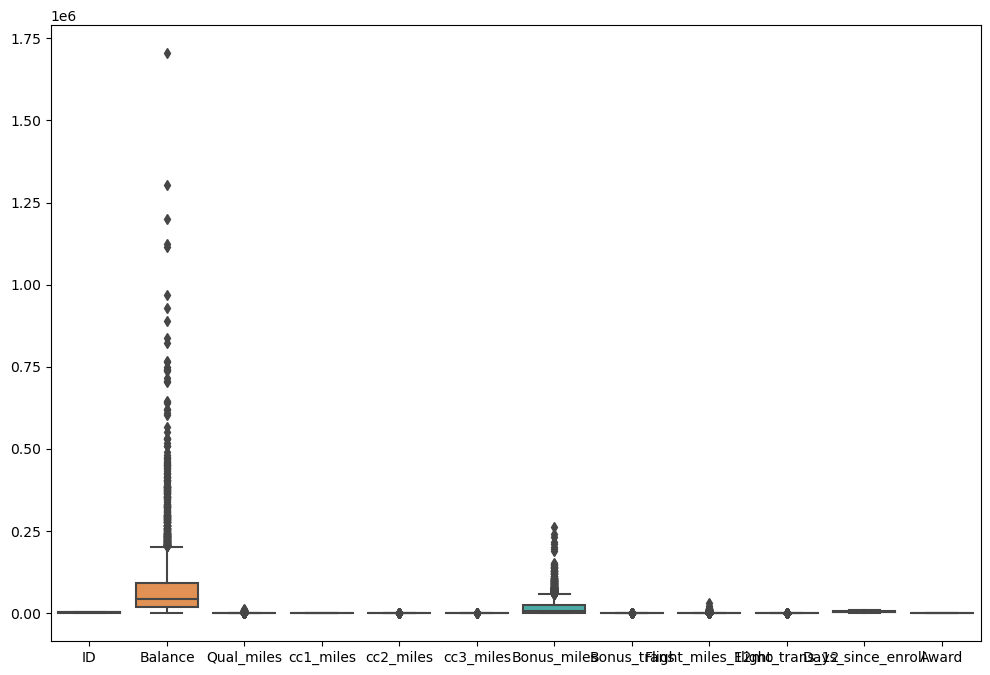

In [11]:
#boxplot 
plt.figure(figsize = (12,8))
sns.boxplot(data=data)

<Axes: >

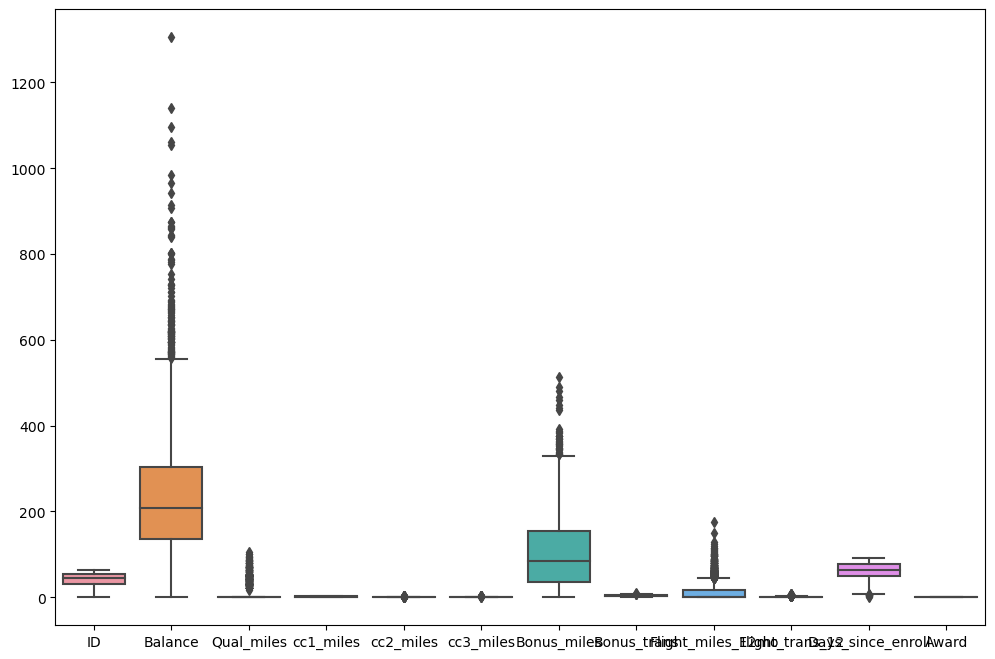

In [12]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

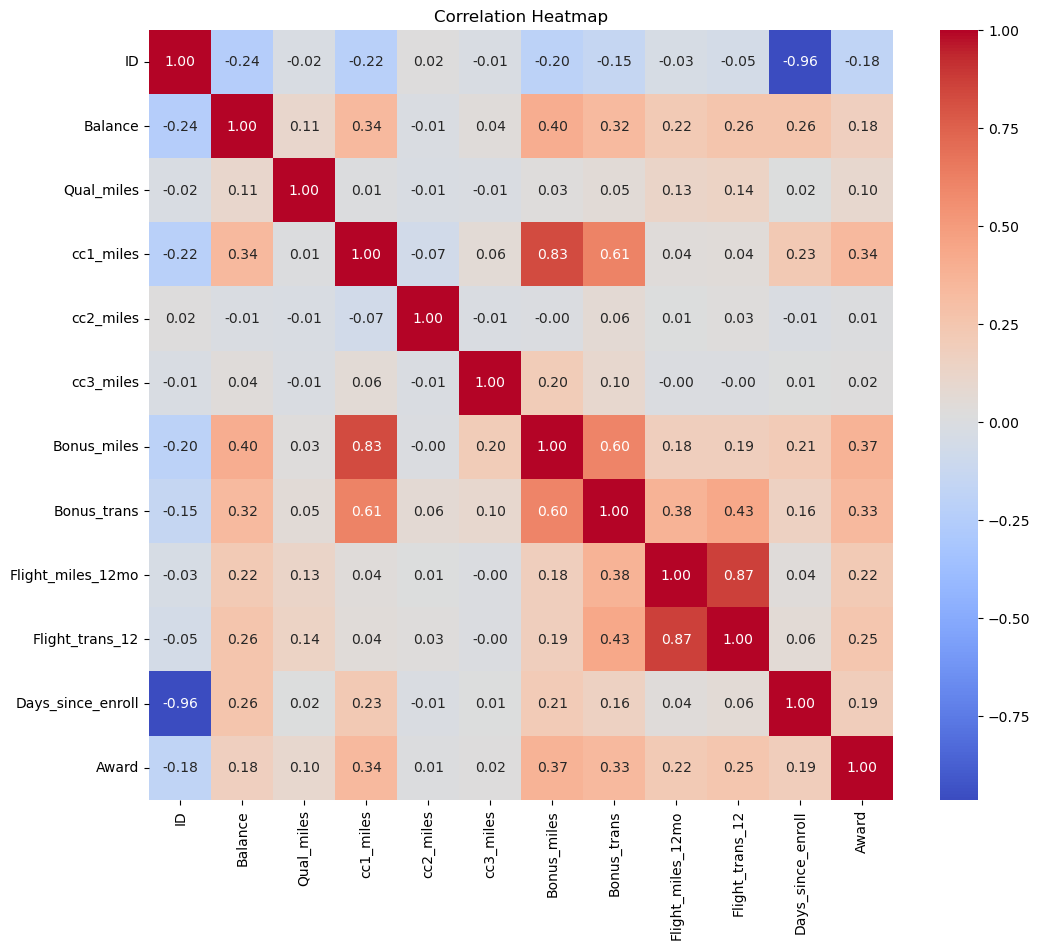

In [13]:
#correlation heatmap

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot = True ,cmap='coolwarm' , fmt =".2f")
plt.title('Correlation Heatmap')
plt.show()

Unique points in this correlation matrix:

* flight_trans_12 is positively correlated with flight_miles_12mo
* bonus_trans is positively correlated with cc1_miles
* bonus_trans is positively correlated with bonus_miles
* bonus_miles is positively correlated with cc1_miles


In other words, the following are positively correlated


* Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
* Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
* Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
* Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

## data preprocessing

In [26]:

# normalizing the hetrogenous  data
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit_transform(data)
norm

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 0.00000000e+00]])

## Hierarchical Clustering on Standardised data

In [15]:
#importing libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

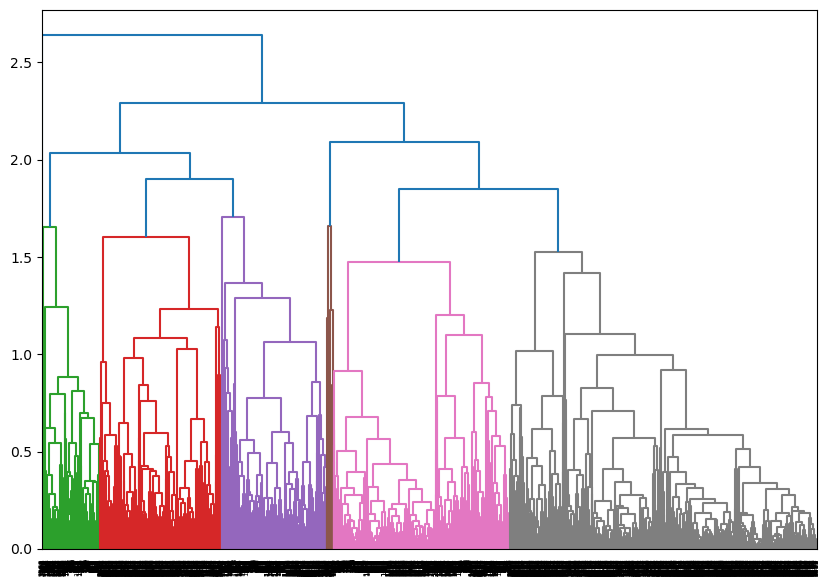

In [27]:
#Create Dendrogram on standardised data

from scipy.cluster import hierarchy
lk=hierarchy.linkage(norm,method='complete')
plt.figure(figsize=(10, 7))
dend=hierarchy.dendrogram(lk)

In [43]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc_pred = hc.fit_predict(norm)
print(y_hc_pred.shape)
y_hc_pred

(3998,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
hc.n_clusters_

5

In [45]:
set(y_hc_pred)

{0, 1, 2, 3, 4}

## Putting Cluster into Original dataset & Analysis

In [46]:
# Concating Labels with main dataset copy
data["Hierarchical Labels"] = y_hc_pred
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [47]:
data.groupby('Hierarchical Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical Labels,,,,,,,,,,,,
0,2172.483512,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0
1,1743.384980,97099.909337,239.744926,2.663058,1.015562,1.018268,28725.065629,15.709066,823.017591,2.536536,4629.606225,1.0
2,2032.000000,53232.000000,888.000000,4.000000,1.000000,1.000000,80696.000000,65.000000,22100.000000,45.000000,3831.000000,1.0
3,2862.000000,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0
4,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


In [48]:
# passenger belongs to the cluster 0
data[data['Hierarchical Labels']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3991,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3992,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [49]:
# passenger belongs to the cluster 1
data[data['Hierarchical Labels']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3988,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [50]:
# passenger belongs to the cluster 2
data[data['Hierarchical Labels']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,2


In [51]:
# passenger belongs to the cluster 3
data[data['Hierarchical Labels']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
2840,2862,8557,0,1,1,1,200622,5,622,3,1955,1,3


In [52]:
# passenger belongs to the cluster 4
data[data['Hierarchical Labels']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,4


<Axes: xlabel='Hierarchical Labels'>

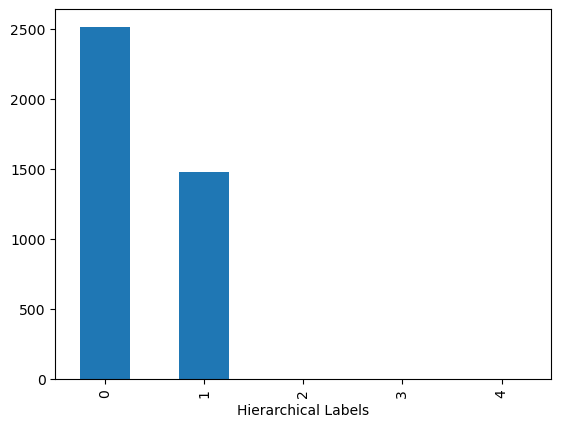

In [53]:
data.groupby(['Hierarchical Labels']).count()['Balance'].plot(kind='bar')

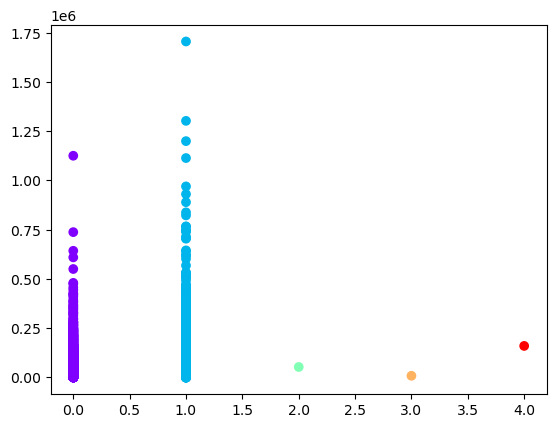

In [73]:
plt.scatter(x=data['Hierarchical Labels'],y=data['Balance'],c=y_hc_pred,cmap='rainbow')

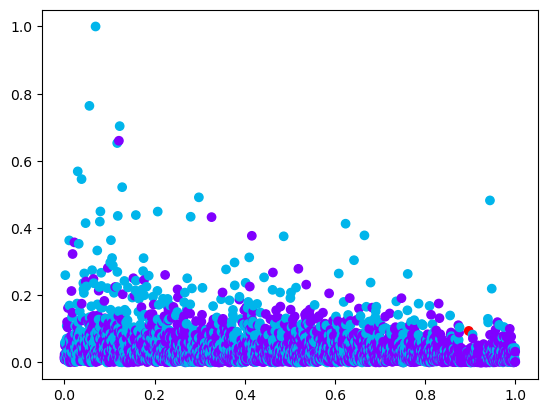

In [72]:
# visualizing the cluster
plt.scatter(norm[:,0],norm[:,1],c=y_hc_pred,cmap='rainbow')

## KMeans 

In [54]:
from sklearn.cluster import KMeans
km=KMeans()


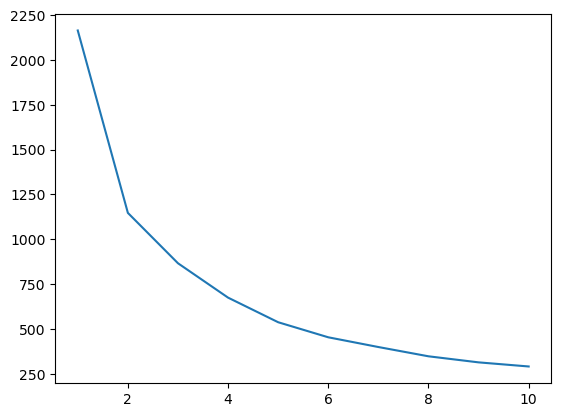

In [55]:
# elbow graph
wcss=[]

for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(norm)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)

In [56]:
# build cluster model with cluster number=5
km=KMeans(n_clusters=5)

In [57]:
ypred_km=km.fit_predict(norm)
ypred_km

array([2, 2, 2, ..., 1, 0, 0])

In [60]:
set(ypred_km)

{0, 1, 2, 3, 4}

In [58]:
data['cluster KM']=ypred_km
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [61]:
# analysing the cluster
data.groupby('cluster KM').agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels
cluster KM,,,,,,,,,,,,,
0,3217.220324,35507.046763,94.525180,1.205935,1.017086,1.006295,4410.214928,6.955036,214.095324,0.598022,1987.607914,0.0,0.000000
1,2063.952020,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0,1.006313
2,1167.635731,49591.404872,90.529002,1.116009,1.017401,1.001160,3376.904872,6.814385,242.636891,0.721578,5574.878190,0.0,0.000000
3,1379.641509,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0,1.001451
4,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,0.000000


In [63]:
from sklearn.metrics import silhouette_score
silhouette_score(norm,ypred_km)

0.4165322980660916

In [65]:
# model with cluster number=4
km1=KMeans(n_clusters=4)
ypred_km1=km1.fit_predict(norm)
ypred_km1
silhouette_score(norm,ypred_km1)
#has less score than the model with cluster number=5, so the optimum number of cluster is 5 for KMean model

0.38541802637061184

<Axes: xlabel='cluster KM'>

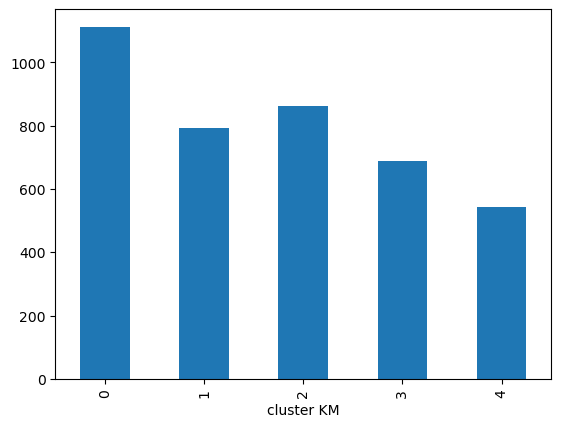

In [66]:
data.groupby(['cluster KM']).count()['Balance'].plot(kind='bar')

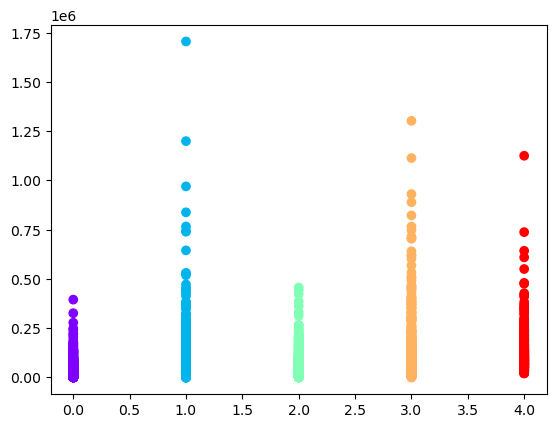

In [74]:
plt.scatter(data['cluster KM'],data['Balance'],c=ypred_km,cmap='rainbow')

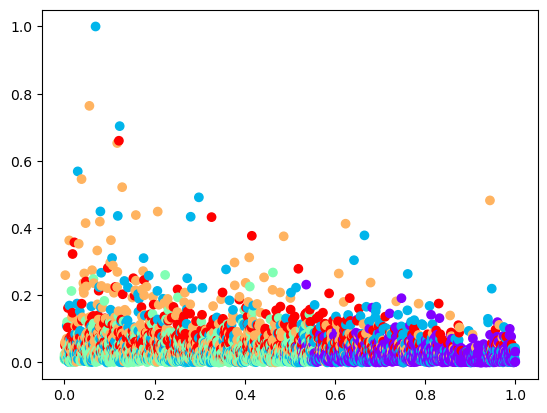

In [70]:
# visualizing the cluster
plt.scatter(norm[:,0],norm[:,1],c=ypred_km,cmap='rainbow')

In [75]:
## passenger belongs to the cluster 0
data[data['cluster KM']==0]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM
1950,1967,15676,0,1,1,1,0,0,0,0,3178,0,0,0
1952,1969,40675,0,1,1,1,1413,9,0,0,2895,0,0,0
2041,2058,15148,0,1,1,1,15148,3,0,0,269,0,0,0
2067,2084,89708,0,1,1,1,8000,4,0,0,3173,0,0,0
2102,2119,59913,0,1,1,1,2210,5,150,1,3481,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0,0
3991,4015,11181,0,1,1,1,929,12,0,0,1407,0,0,0
3992,4016,3974,0,1,1,1,365,3,0,0,1397,0,0,0
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [76]:
## passenger belongs to the cluster 1
data[data['cluster KM']==1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,1,1
36,37,23193,0,1,1,1,650,4,550,3,7861,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,4010,11933,0,1,1,1,249,3,79,1,1412,1,1,1
3988,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1,1
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1


In [77]:
## passenger belongs to the cluster 2
data[data['cluster KM']==2]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,0,2
2190,2207,61617,0,2,1,1,23495,13,0,0,3972,0,0,2
2192,2209,112891,0,1,1,1,500,1,500,1,3909,0,0,2
2200,2217,12271,500,2,1,1,7684,15,1000,2,4219,0,0,2


In [78]:
## passenger belongs to the cluster 3
data[data['cluster KM']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,1,3
3880,3904,32424,0,4,1,1,39635,16,0,0,1584,1,1,3
3882,3906,126167,0,5,1,1,190160,15,0,0,1612,1,1,3
3907,3931,57642,0,4,1,1,52176,15,0,0,1564,1,1,3


In [79]:
## passenger belongs to the cluster 4
data[data['cluster KM']==4]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,4
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,0,4
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,0,4
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,0,4
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,3909,84979,0,4,1,1,36702,16,0,0,1600,0,0,4
3898,3922,90666,0,4,1,1,32474,14,0,0,1582,0,0,4
3916,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0,4
3965,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0,4


##  DBSCAN

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
# need  to find the  optimal values for 'eps' and 'min_value'
from sklearn.neighbors import NearestNeighbors

In [83]:
nn=NearestNeighbors(n_neighbors=3).fit(norm)

In [84]:
d,i=nn.kneighbors(norm)

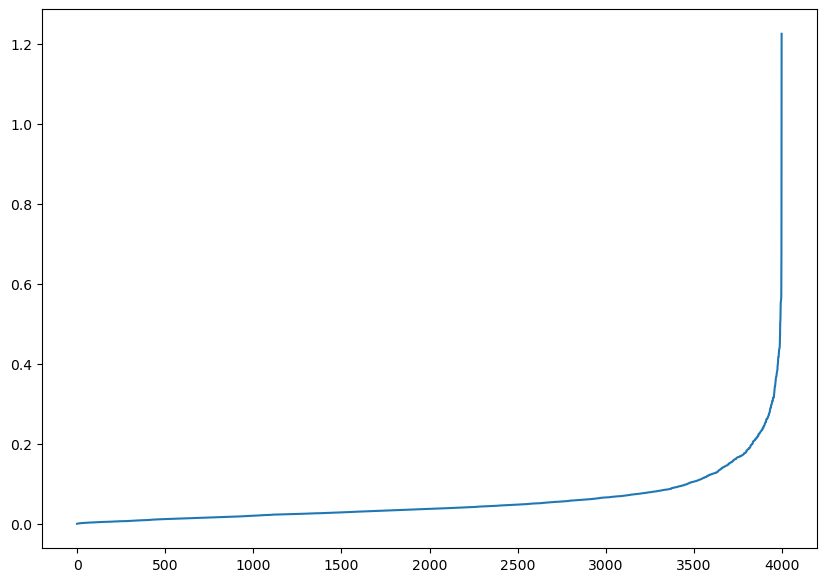

In [85]:
distance=np.sort(d[:,1])
plt.figure(figsize=(10,7))
plt.plot(distance)

In [87]:
db=DBSCAN(eps=1,min_samples=4)

In [88]:
ypred_db=db.fit_predict(norm)

In [89]:
ypred_db

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [90]:
data['cluster DB']=ypred_db
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical Labels,cluster KM,cluster DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


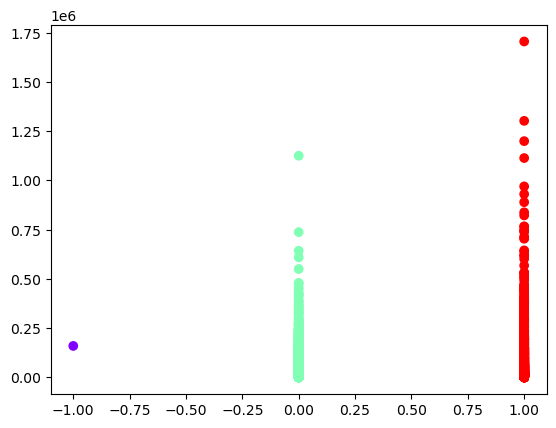

In [91]:
plt.scatter(data['cluster DB'],data['Balance'],c=ypred_db,cmap='rainbow')

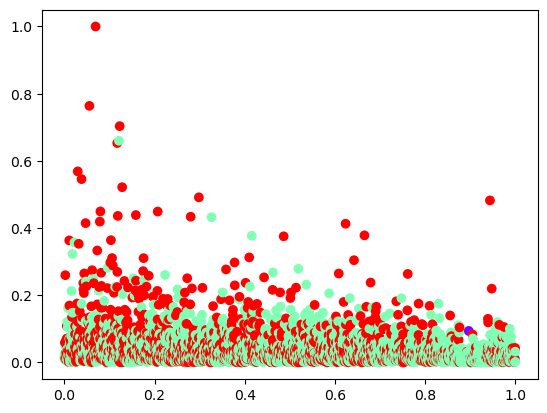

In [92]:
# visualizing the cluster
plt.scatter(norm[:,0],norm[:,1],c=ypred_db,cmap='rainbow')

<Axes: xlabel='cluster DB'>

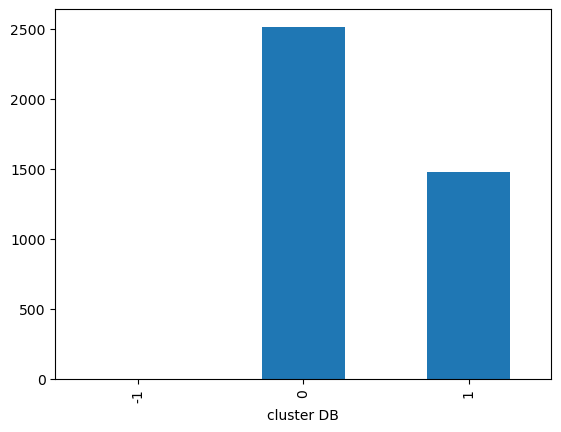

In [93]:
data.groupby(['cluster DB']).count()['Balance'].plot(kind='bar')